# Fit the RLDDM on individual data

In [1]:
import pandas as pd

from rlssm.utility.load_data import load_example_dataset
from rlssm.model.models_DDM import RLDDModel

## Import the data

In [2]:
# import some example data:
data = load_example_dataset(hierarchical_levels = 1)

data.head()

participant  block_label  trial_block  f_cor  f_inc  cor_option  \
0            8            1            1     34     37           2   
1            8            1            2     41     35           2   
2            8            1            3     51     51           4   
3            8            1            4     55     43           4   
4            8            1            5     53     48           4   

   inc_option  times_seen        rt  accuracy  
0           1           1  2.227985         1  
1           1           2  2.215362         1  
2           3           1  1.574919         0  
3           3           2  1.971866         0  
4           2           3  1.645202         1

## Initialize the model

In [3]:
# you can "turn on and off" different mechanisms:
model = RLDDModel(hierarchical_levels=1,
                  separate_learning_rates=False,
                  threshold_modulation=False,
                  nonlinear_mapping=True)

15:26:55 - cmdstanpy - INFO - compiling stan file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan to exe file /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin
15:27:12 - cmdstanpy - INFO - compiled model executable: /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin
15:27:12 - cmdstanpy - WARNING - Stan compiler has produced 12 warnings:
15:27:12 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.hpp /home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan
Warning in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 4, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag

## Fit

In [4]:
# sampling parameters
n_warmup = 1000
n_sampling = 3000
n_chains = 2

# learning parameters
K = 4 # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5 # initial learning value (Q0)

In [5]:
model_fit = model.fit(
    data,
    K,
    initial_value_learning,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains = n_chains)

15:27:12 - cmdstanpy - INFO - CmdStan start processing


Fitting the model using the priors:
alpha_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 1, 'sd': 50}
drift_asymptote_priors {'mu': 1, 'sd': 50}
threshold_priors {'mu': 1, 'sd': 5}
ndt_priors {'mu': 1, 'sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

15:28:47 - cmdstanpy - INFO - CmdStan done processing.
15:28:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: wiener_lpdf: Random variable  = 2.22798, but must be greater than nondecision time = 58.3251 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 2.22798, but must be greater than nondecision time = 57.0011 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 2.22798, but must be greater than nondecision time = 13.3708 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 59)
	Exception: wiener_lpdf: Random variable  = 2.22798, but must be greater than nondecision time = 2.44825 (in '/home/andrei/PycharmProjects/rlssm/rlssm/stan_models/RLDDM/RLDDM_nonlin.stan', line 90, column 1 to column 

15:28:48 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 52 divergent transitions (1.7%)
	Use function "diagnose()" to see further information.


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 6000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
52.0 of 6000 iterations ended with a divergence (0.8666666666666667%)
  Try running with larger adapt_delta to remove the divergences


### get Rhat

In [6]:
model_fit.rhat

rhat         variable
name                                     
lp__             1.02327             lp__
alpha            1.04611            alpha
drift_scaling    1.02566    drift_scaling
drift_asymptote  1.04662  drift_asymptote
threshold        1.00141        threshold
...                  ...              ...
log_lik[236]     1.00594     log_lik[236]
log_lik[237]     1.00238     log_lik[237]
log_lik[238]     1.02586     log_lik[238]
log_lik[239]     1.03686     log_lik[239]
log_lik[240]     1.03754     log_lik[240]

[1698 rows x 2 columns]

### get wAIC

In [7]:
model_fit.waic

{'lppd': -296.9717138059476,
 'p_waic': 6.808478254732092,
 'waic': 607.5603841213594,
 'waic_se': 31.442431171687662}

## Posteriors

In [8]:
model_fit.samples.describe()

transf_alpha  transf_drift_scaling  transf_drift_asymptote  \
count   6000.000000           6000.000000             6000.000000   
mean       0.103184              8.776812                1.764893   
std        0.107043             16.960350                0.275645   
min        0.000173              0.098308                1.098710   
25%        0.026715              0.613513                1.582260   
50%        0.063141              1.502545                1.729455   
75%        0.145109              7.051130                1.903763   
max        0.647179            131.511000                3.215940   

       transf_threshold   transf_ndt  
count       6000.000000  6000.000000  
mean           2.170292     0.749957  
std            0.084360     0.018665  
min            1.911770     0.680545  
25%            2.112750     0.738271  
50%            2.165685     0.750493  
75%            2.221528     0.762891  
max            2.477770     0.803935

In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

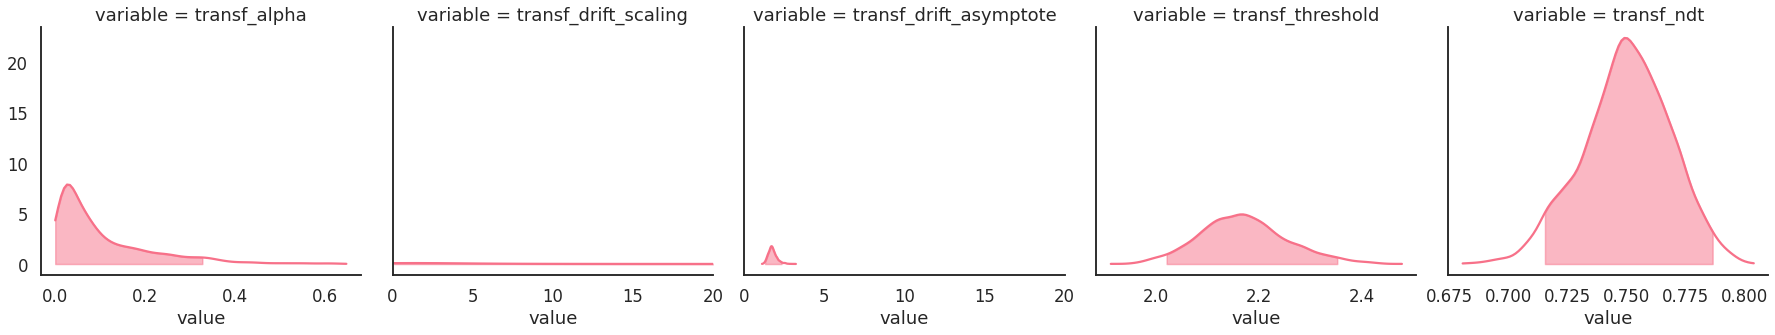

In [10]:
g = model_fit.plot_posteriors(height=5, show_intervals='HDI')

g.axes.flat[1].set_xlim(0, 20)
g.axes.flat[2].set_xlim(0, 20);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         4.943201  4.690201  1.068201  1.124201  1.106201  2.280201   
2         2.437812  1.469812  1.339812  1.358812  1.606812  1.280812   
3         1.855209  0.996209  2.020209  1.586209  0.988209  1.934209   
4              NaN  1.538012  1.298012  1.902012  0.955012  1.611012   
5         2.977640  2.379640  1.349640  1.449640  1.327640  1.456640   
...            ...       ...       ...       ...       ...       ...   
96        1.229986  1.879986  2.321986  1.207986  1.130986  1.445986   
97        2.544040  4.759040  3.175040  6.779040  1.158040  1.980040   
98        1.504756  2.116756  1.025756  1.139756  2.098756  1.373756   
99        1.876816  3.036816  2.321816  2.403816  2.240816  1.783816   
100       2.285537  1.262537  2.394537  2.581537  1.852537  2.108537   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.941201  1.309201  2.558201  1.108201  ...      1.0  1.0  1.0  0.0   
2         1.701812  0.969812  1.730812  1.919812  ...      1.0  1.0  1.0  1.0   
3         1.491209  1.439209  1.758209  0.955209  ...      1.0  1.0  1.0  1.0   
4         1.269012  3.001012  1.218012  1.130012  ...      1.0  1.0  1.0  1.0   
5         1.198640  2.905640  2.044640  4.519640  ...      1.0  1.0  1.0  0.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        0.997986  3.883986  2.498986  1.581986  ...      1.0  1.0  1.0  1.0   
97        2.766040  2.855040  2.664040  1.509040  ...      1.0  0.0  1.0  1.0   
98        2.458756  1.916756  1.472756  2.538756  ...      1.0  1.0  1.0  1.0   
99        2.624816  2.810816  1.346816  3.431816  ...      0.0  1.0  1.0  1.0   
100       1.268537  1.099537  1.826537  2.055537  ...      1.0  1.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         0.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  0.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  0.0  1.0  1.0  
97        1.0  0.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  1.0  1.0  1.0  
100       1.0  1.0  1.0  1.0  1.0  1.0  

[100 rows x 480 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

mean_accuracy   mean_rt  skewness  quant_10_rt_low  quant_30_rt_low  \
sample                                                                        
1            0.779167  1.728489  1.773916         1.041601         1.260401   
2            0.816667  1.799249  1.560387         1.074912         1.279512   
3            0.695833  1.758059  1.219739         1.059809         1.387009   
4            0.779167  1.782016  1.885594         1.100212         1.290812   
5            0.825000  1.879823  1.664034         1.071740         1.332440   
...               ...       ...       ...              ...              ...   
96           0.850000  1.777953  1.371334         1.168986         1.388486   
97           0.808333  1.706373  1.363352         1.047540         1.178540   
98           0.870833  1.790785  2.240639         1.015756         1.237756   
99           0.854167  1.737204  1.874272         1.035616         1.235216   
100          0.875000  1.711283  2.135012         1.169637         1.427437   

        quant_50_rt_low  quant_70_rt_low  quant_90_rt_low  quant_10_rt_up  \
sample                                                                      
1              1.539201         2.054401         2.677201        1.029601   
2              1.549812         1.966112         2.729512        1.059312   
3              1.556209         1.976209         2.980409        1.026609   
4              1.601012         1.872412         2.347412        1.035012   
5              1.636140         2.324040         3.191040        1.029940   
...                 ...              ...              ...             ...   
96             1.748986         2.198986         2.906986        1.002586   
97             1.292040         1.987040         2.596040        1.064540   
98             1.655756         2.239756         3.433756        1.060356   
99             1.471816         1.921216         3.705016        0.996616   
100            1.599037         1.815837         3.543537        1.002637   

        quant_30_rt_up  quant_50_rt_up  quant_70_rt_up  quant_90_rt_up  
sample                                                                  
1             1.196201        1.522201        1.852001        2.716601  
2             1.268312        1.531812        2.015812        2.951312  
3             1.258609        1.540209        2.021809        2.728409  
4             1.238612        1.545012        2.037012        3.015412  
5             1.298140        1.563140        2.074540        3.031140  
...                ...             ...             ...             ...  
96            1.235886        1.570486        2.031286        2.622786  
97            1.278840        1.548040        1.887540        2.694440  
98            1.275956        1.558756        1.894556        2.642756  
99            1.256216        1.522816        1.883616        2.757416  
100           1.202837        1.513037        1.842337        2.574237  

[100 rows x 13 columns]

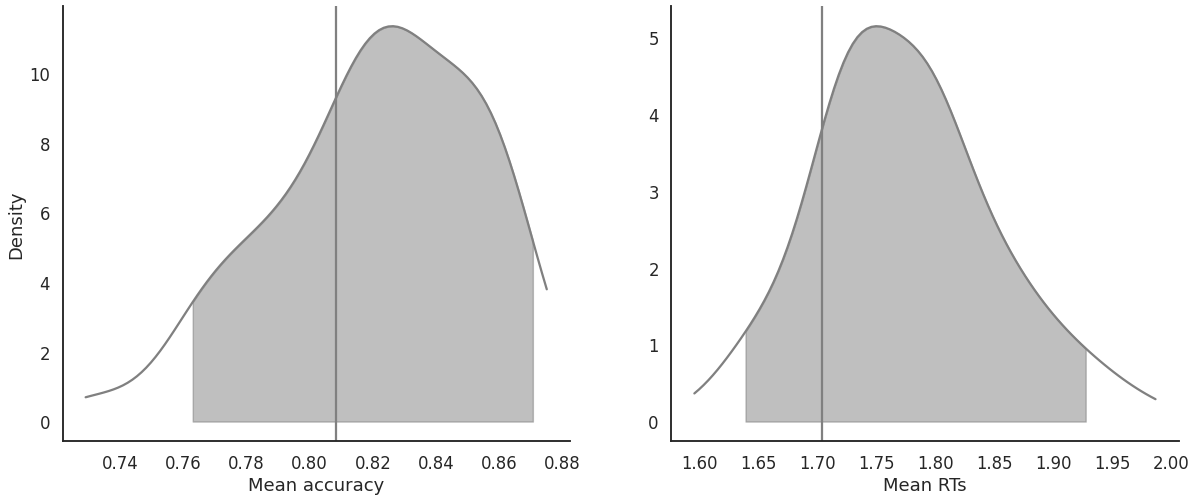

In [13]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

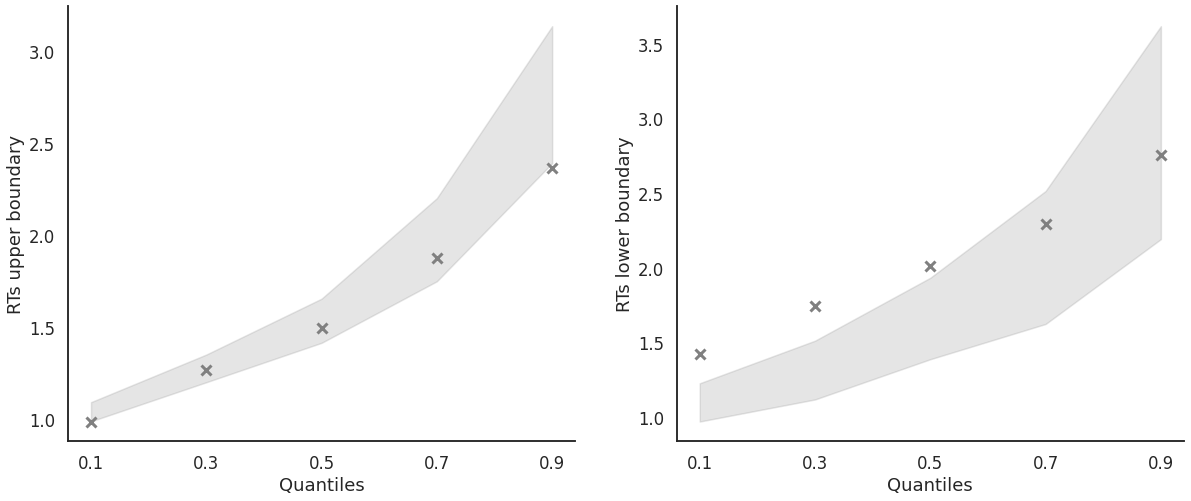

In [14]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [15]:
import numpy as np

In [16]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [17]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.85  1.768601  0.874158   
                        2                0.70  1.736612  1.556330   
                        3                0.70  1.716909  0.911497   
                        4                0.70  1.716462  1.369495   
                        5                0.75  1.887790  2.119289   
...                                       ...       ...       ...   
3           CD          96               0.95  1.991386  1.080089   
                        97               0.85  1.589640  0.910844   
                        98               0.85  1.939806  2.321973   
                        99               0.80  1.800216  1.224057   
                        100              0.90  1.836137  1.318293   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.919601        1.247801   
                        2              1.127812        1.262912   
                        3              1.209209        1.127209   
                        4              1.385012        1.356912   
                        5              1.309640        1.429240   
...                                         ...             ...   
3           CD          96             1.480986        1.383786   
                        97             1.709640        1.248440   
                        98             1.776756        1.115956   
                        99             1.609216        1.142816   
                        100            1.905837        1.385337   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              2.341201        1.550201   
                        2              1.162312        1.441312   
                        3              1.370209        1.711709   
                        4              1.519512        1.527012   
                        5              1.777640        1.496640   
...                                         ...             ...   
3           CD          96             1.480986        1.887986   
                        97             2.198040        1.480040   
                        98             2.218756        1.475756   
                        99             1.717316        1.411816   
                        100            2.178037        1.588537   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              2.763601        2.022201  
                        2              1.380812        1.735312  
                        3              2.052709        1.885109  
                        4              1.681012        1.962612  
                        5              1.865640        1.847440  
...                                         ...             ...  
3           CD          96             1.480986        2.491186  
                        97             2.437240        1.665240  
                        98             3.771556        1.810956  
                        99             1.860316        1.968316  
                        100            2.450237        1.976037  

[1200 rows x 9 columns]

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.700000  2.082034  2.419421         1.090601   
           2            0.600000  1.704812  0.759491         1.373012   
           3            0.533333  1.816876  1.927272         1.522409   
           4            0.666667  2.055145  2.438910         1.519212   
           5            0.666667  1.822807  1.564461         1.256940   
...                          ...       ...       ...              ...   
8          96           0.933333  1.804219  1.981143         2.211086   
           97           0.900000  1.546140  2.116727         1.358040   
           98           0.900000  1.770089  2.697278         1.517556   
           99           0.966667  1.712216  1.214747         2.432816   
           100          0.966667  1.786570  2.153209         1.240537   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.450201         1.537201        1.858201   
           2             1.397512         1.560812        1.638312   
           3             1.400709         1.978209        1.546209   
           4             1.475512         1.705012        1.765012   
           5             1.399540         2.016140        1.778640   
...                           ...              ...             ...   
8          96            1.231986         2.246486        1.505986   
           97            1.109440         1.548040        1.218040   
           98            1.243756         1.798756        1.405756   
           99            1.188616         2.432816        1.459816   
           100           1.161737         1.240537        1.455537   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              2.076201        2.312201  
           2              2.086712        1.966712  
           3              2.509009        1.665209  
           4              2.047012        2.032412  
           5              2.495740        1.885440  
...                            ...             ...  
8          96             2.281886        1.813786  
           97             1.587640        1.656840  
           98             2.021956        1.748956  
           99             2.432816        1.743216  
           100            1.240537        1.963937  

[800 rows x 9 columns]

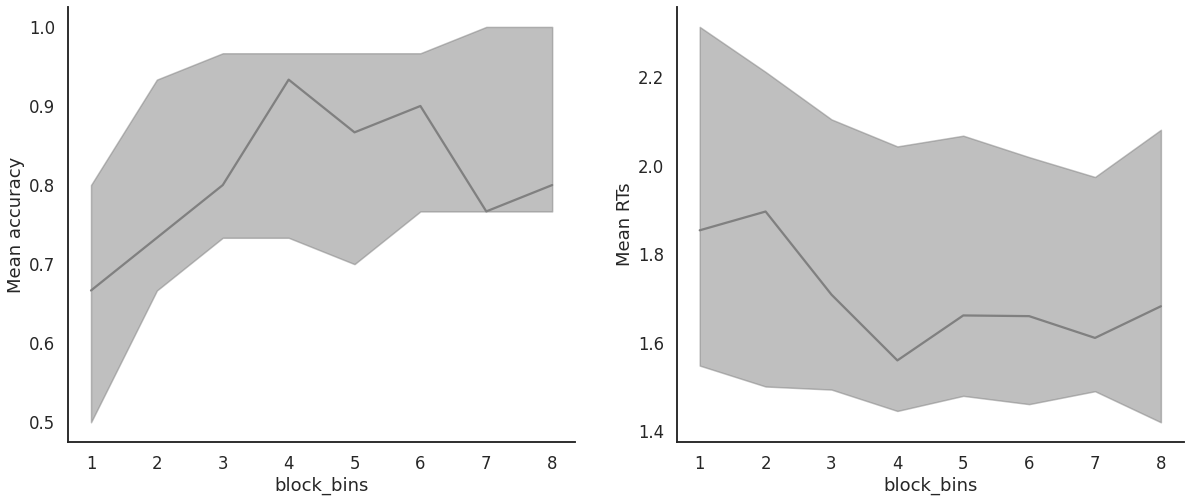

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

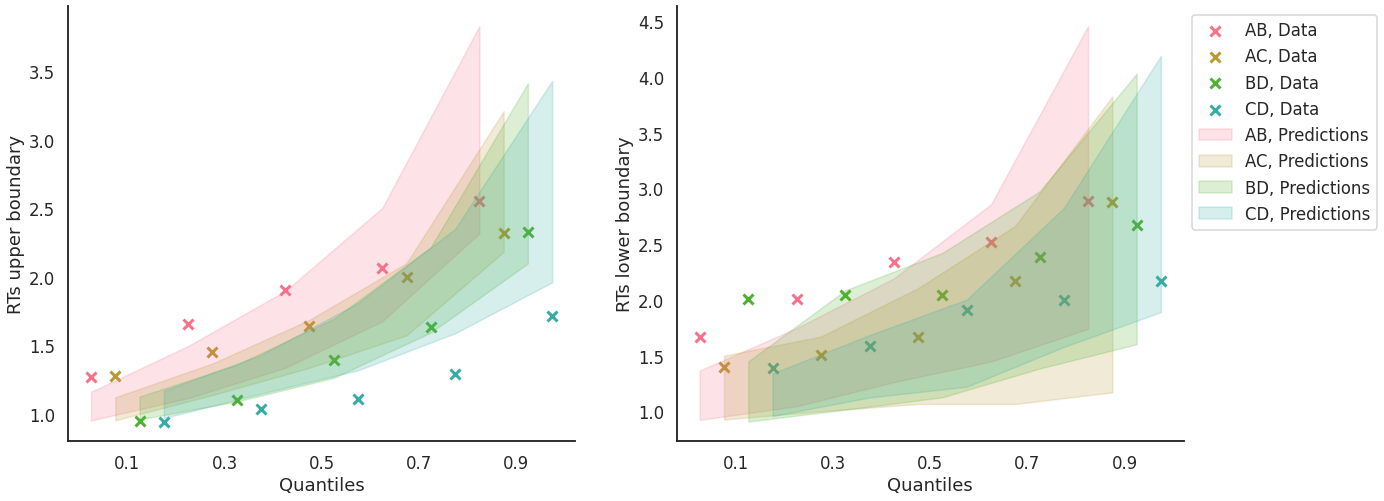

In [20]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);

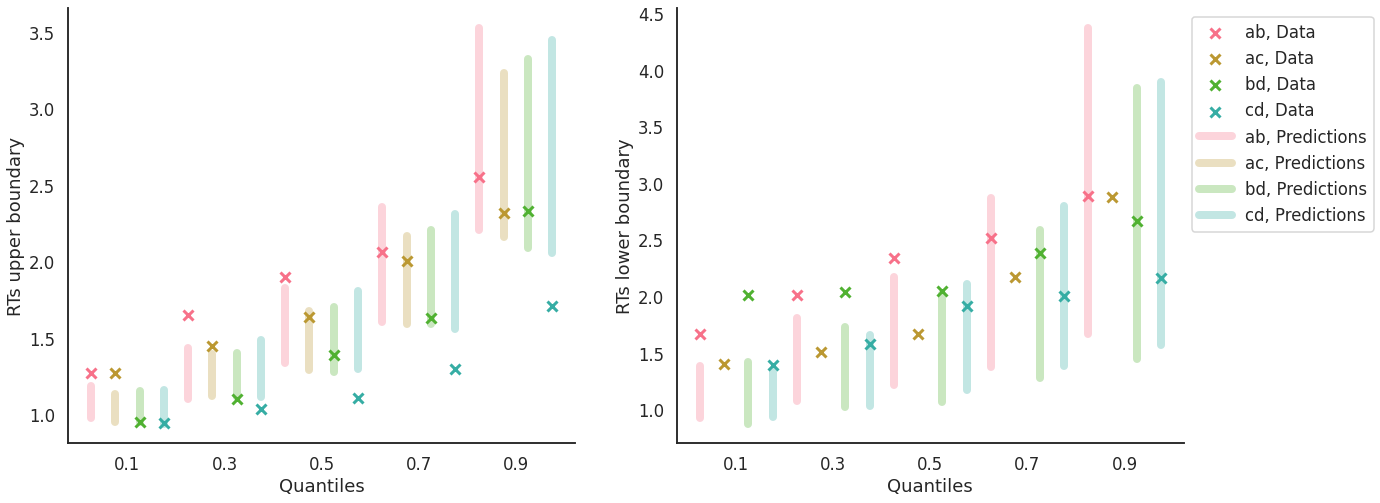

In [21]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);